In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# File name: dec_dependent_scale_factor.py
"""
Created on Thu Jun 28 00:05:20 2018

@author: Neo(liuniu@smail.nju.edu.cn)

"""

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, deg2rad, sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# My modules
from error_inflation_progs import (
    error_inflation, declination_error_calc_DSM, wrms_calc)

In [2]:
# Load data
datfile = ("../data/odd-even-a.cat_diff")
soulist = np.genfromtxt(datfile, usecols=(0,), dtype=str)
RA, Dec, dRAc, dDec, dRAc_err, dDec_err = np.genfromtxt(
    datfile, usecols=range(1, 7), unpack=True)
num_ses_mean, num_obs_mean = np.genfromtxt(
    datfile, dtype=int, usecols=range(7, 9), unpack=True)

# Load results of scale factor and noise floor
lab = np.genfromtxt("../logs/nf_sf.dat_a", usecols=(0,), dtype=str)
sf_RA, nf_RA, sf_Dec, nf_Dec = np.genfromtxt(
    "../logs/nf_sf.dat_a", usecols=(1, 3, 5, 7), unpack=True)

In [3]:
# Calculate the offset and normalized seperation
rho = sqrt(dRAc**2 + dDec**2)
rho_err = sqrt(dRAc_err**2 + dDec_err**2)

# use a criteria "offset <= 1 mas" and "normalized seperation < 5" to remove outliers
con = (rho <= 1.) & (rho/rho_err <= 5.)

Decn = Dec[con]
dRAcn = dRAc[con]
dDecn = dDec[con]
dRAc_errn = dRAc_err[con]
dDec_errn = dDec_err[con]
num_ses_meann = num_ses_mean[con]

print("The decimation solutions have %d common sources, %d remain after removing outliers." 
      % (dRAc.size, dRAcn.size))

The decimation solutions have 2587 common sources, 1727 remain after removing outliers.


In [4]:
# Inflate the formal error
# ----------------
# Result of SBL1
# sf_RA[0], nf_RA[0] = 1.482, 0.031
# sf_Dec[0], nf_Dec[0] = 1.283, 0.033

dRAc_err_inf0 = error_inflation(dRAc_errn, sf_RA[0], nf_RA[0])
dDec_err_inf0 = error_inflation(dDec_errn, sf_Dec[0], nf_Dec[0])

# Calculate the declination-dependent noise and scale factor
dec_means0, sf_RAs0, nf_RAs0, sf_Decs0, nf_Decs0 = declination_error_calc_DSM(
    Decn, dRAcn, dDecn, dRAc_err_inf0, dDec_err_inf0)

#  bin   Num_sou    sf_ra    nf_ra   sf_dec   sf_dec
[-90,-75)    17    1.167    0.059    1.023    0.057
[-75,-60)    54    0.899    0.068    0.970    0.075
[-60,-45)    53    0.795    0.054    0.979    0.073
[-45,-30)   119    0.807    0.043    0.961    0.064
[-30,-15)   219    0.829    0.047    0.902    0.058
[-15, +0)   228    0.974    0.052    0.991    0.065
[ +0,+15)   266    0.937    0.046    1.012    0.062
[+15,+30)   278    0.942    0.049    0.844    0.054
[+30,+45)   219    0.948    0.044    0.959    0.054
[+45,+60)   150    0.852    0.038    1.004    0.053
[+60,+75)    94    0.796    0.036    0.950    0.049
[+75,+90)    30    1.205    0.042    0.975    0.040


In [5]:
# ----------------
# Result of SBL2
# sf_RA[1], nf_RA[1] = 1.382, 0.024
# sf_Dec[1], nf_Dec[1] = 1.234, 0.027

dRAc_err_inf1 = error_inflation(dRAc_errn, sf_RA[1], nf_RA[1])
dDec_err_inf1 = error_inflation(dDec_errn, sf_Dec[1], nf_Dec[1])

# Calculate the declination-dependent noise and scale factor
dec_means1, sf_RAs1, nf_RAs1, sf_Decs1, nf_Decs1 = declination_error_calc_DSM(
    Decn, dRAcn, dDecn, dRAc_err_inf1, dDec_err_inf1)

#  bin   Num_sou    sf_ra    nf_ra   sf_dec   sf_dec
[-90,-75)    17    1.128    0.065    0.884    0.054
[-75,-60)    54    0.872    0.071    0.835    0.074
[-60,-45)    53    0.779    0.057    0.841    0.071
[-45,-30)   119    0.785    0.048    0.833    0.062
[-30,-15)   219    0.806    0.052    0.780    0.055
[-15, +0)   228    0.943    0.059    0.855    0.061
[ +0,+15)   266    0.898    0.050    0.876    0.060
[+15,+30)   278    0.904    0.055    0.730    0.052
[+30,+45)   219    0.907    0.049    0.825    0.051
[+45,+60)   150    0.806    0.043    0.867    0.050
[+60,+75)    94    0.761    0.041    0.832    0.047
[+75,+90)    30    1.113    0.046    0.848    0.038


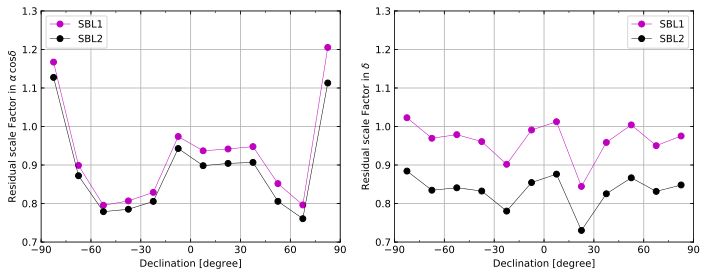

In [8]:
# wrms difference VS median formal uncertainty (Log-plot)
fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), ncols=2, sharex=True)

ax0.plot(dec_means0, sf_RAs0, "mo-", lw=0.5, label="SBL1")
ax0.plot(dec_means1, sf_RAs1, "ko-", lw=0.5, label="SBL2")


ax1.plot(dec_means0, sf_Decs0, "mo-", lw=0.5, label="SBL1")
ax1.plot(dec_means1, sf_Decs1, "ko-", lw=0.5, label="SBL2")


ax0.set_xlabel("Declination [degree]")
ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_ylabel("Residual scale Factor in $\\alpha\\,\\cos\\delta$")
ax0.set_ylim([0.7, 1.3])
# ax0.set_yticks(np.arange(0.5, 2.1, 0.5))
ax0.xaxis.set_ticks_position('both')
ax0.yaxis.set_ticks_position('both')
ax0.grid(True)
ax0.legend()

ax1.set_xlabel("Declination [degree]")
ax1.set_xlim([-90, 90])
ax1.set_xticks(np.arange(-90, 91, 30))
ax1.set_ylabel("Residual scale Factor in $\\delta$")
ax1.set_ylim([0.7, 1.3])
# ax1.set_yticks(np.arange(0.5, 2.1, 0.5))
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax1.grid(True)
ax1.legend()

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
minorLocator = MultipleLocator(0.1)
ax0.yaxis.set_minor_locator(minorLocator)
ax1.yaxis.set_minor_locator(minorLocator)

minorLocator = MultipleLocator(15)
ax0.xaxis.set_minor_locator(minorLocator)
ax1.xaxis.set_minor_locator(minorLocator)

# ax1.grid(True)
plt.tight_layout()
# plt.subplots_adjust(hspace=0.1)
# plt.savefig("../plots/dec_inflated_sf-a.eps")